## Estimating the population mean
Suppose we have independent samples $x_1, x_2, \dots, x_N$ from some unknown distribution, whose mean $\mu$ we want to estimate. We can compute the sample mean $\bar{x}$ as usual:
\begin{equation}
\bar{x} = \frac{1}{N}\sum_{i=1}^N x_i.
\end{equation}
Should we report $\bar{x}$ as our estimate for the popoulation mean $\mu$? The probability that these two numbers literally coincide is zero. The reason is that $\bar{x}$ is actualy a random variable, while $\mu$ is just a number: for a different set of $N$ independent samples, $\bar{x}$ would be different! In fact, we can compute the mean of $\bar{x}$:

\begin{align*}
\mu_{\bar{x}}
    &= \mathbb{E}[\bar{x}] \\
    &= \frac{1}{N}\sum_{i=1}^N \mathbb{E}[x_i] \\
    &= \frac{1}{N}\sum_{i=1}^N \mu \\
    &= \mu,
\end{align*}

and also its variance:

\begin{align*}
\sigma_{\bar{x}}^2
    &= \mathbb{E}[(\bar{x} - \mu_{\bar{x}})^2] \\
    &= \frac{1}{N^2}\sum_{i,j=1}^N \mathbb{E}[(x_i - \mu)(x_j - \mu)] \\
    &= \frac{1}{N^2}\sum_{i,j=1}^N \text{Cov}[x_i, x_j] \\
    &= \frac{1}{N^2}\sum_{i,j=1}^N \sigma^2\delta_{ij} \\
    &= \frac{\sigma^2}{N}.
\end{align*}

In the above derivation we have used $\text{Cov}[x_i, x_j] = \sigma^2\delta_{ij}$, which follows from the independence of $x_i$ and $x_j$ for all $i\neq j$.
So the mean of $\bar{x}$ is the population mean $\mu$, and its standard deviation is $\sigma/\sqrt{N}$ (often referred to as the *standard error of mean*). Therefore, the larger the sample size, the closer the sample mean $\bar{x}$ is likely to be to the population mean $\mu$. Makes sense! Note that this result doesn't depend on the underlying distribution.

Back to estimating the mean. Instead of just reporting $\bar{x}$ (based on one set of samples) as our estimate of the mean, it would be nice if we could make the following statement: there's (say) a $95\%$ chance that the interval $(x_L, x_U)$ contains the population mean, i.e $x_L \le \mu \le x_U$. Concretely, given a confidence level (e.g. $95\%$) and samples $x_1, x_2, \dots, x_N$, we aim to find a way of calculating $x_L$ and $x_U$ such that if we play the following game many times, we'd find that the percentage of times $\mu$ is contained in $(x_L, x_U)$ is given by the confidence level:
* Generate samples $x_1, x_2, \dots, x_N$.
* Calculate $x_L$ and $x_U$ from samples and confidence level.
* Check if population mean $\mu$ is in the *confidence interval* $(x_L, x_U)$.

## Normal population with known variance
Let's make the simplifying assumption that $x_1, x_2, \dots, x_N$ are drawn from the normal distribution $\mathcal{N}(\mu, \sigma^2)$.

#### Claim
$x_L=\bar{x}-z\frac{\sigma}{\sqrt{N}}$ and $x_U=\bar{x}+z\frac{\sigma}{\sqrt{N}}$ define a valid confidence interval for confidence level $1-\alpha$ ($0\le \alpha \le 1$), where $z=\Phi^{-1}(1-\alpha/2)$ and $\Phi^{-1}$ is the inverse CDF of the standard normal distribution.

#### Proof
Because $x_i$ are distributed as $\mathcal{N}(\mu, \sigma^2)$, $\frac{\bar{x} - \mu}{\sigma/\sqrt{N}}$ is distributed as $\mathcal{N}(0, 1)$, i.e. the standard normal distribution. This follows from the following properties of the normal distribution:
1. If $X \sim \mathcal{N}(\mu, \sigma^2)$, then $\beta X \sim \mathcal{N}(\beta\mu, \beta^2\sigma^2)$, for any real number $\beta$.
2. If $X \sim \mathcal{N}(\mu, \sigma^2)$, then $X + \beta \sim \mathcal{N}(\mu + \beta, \sigma^2)$, for any real number $\beta$.
3. If $X_1,\dots,X_N$ are independent normal random variables, each distributed as $\mathcal{N}(\mu_i, \sigma_i^2)$, then $X_1+\dots +X_N \sim \mathcal{N}(\mu_1+\dots+\mu_N, \sigma_1^2+\dots+\sigma_N^2)$.

It follows from 3 that $x_1+x_2+\dots+x_N=N\bar{x}\sim \mathcal{N}(N\mu, N\sigma^2)$, and from 1: $\frac{\bar{x}}{\sigma/\sqrt{N}}\sim \mathcal{N}(\frac{\mu}{\sigma/\sqrt{N}}, 1)$, and finally from 2: $\frac{\bar{x} - \mu}{\sigma/\sqrt{N}} \sim \mathcal{N}(0, 1)$.

The probability that $\mu$ is within the confidence interval is given by:

\begin{align*}
P(\bar{x}-z\sigma/\sqrt{N} \le \mu \le \bar{x}+z\sigma/\sqrt{N})
    &= P(-z \le \frac{\bar{x} - \mu}{\sigma/\sqrt{N}} \le z) \\
    &= 2\Phi(z)-1 \\
    &=2\Phi(\Phi^{-1}(1-\alpha/2))-1 \\
    &=1-\alpha.
\end{align*}

Excellent! So now when we're given the samples $x_1, x_2, \dots, x_N$, we can calculate a confidence interval for a given confidence level. Or can we? To get $\bar{x}\pm z\frac{\sigma}{\sqrt{N}}$, we can calculate $\bar{x}$ from the samples, $z$ from the confidence level, but what about $\sigma$? We need to know the population standard deviation, which often is not the case. So what now?

## Normal population with unknown variance
What if we replace the population variance with the unbiased sample variance $\hat{\sigma}^2$:

\begin{equation}
\hat{\sigma}^2=\frac{1}{N-1}\sum_{i=1}^N(x_i-\bar{x})^2.
\end{equation}

Consider the random variable
\begin{equation}
t = \frac{\bar{x} - \mu}{\hat{\sigma}/\sqrt{N}}.
\end{equation}
Because of the presence of $\hat{\sigma}$ (as opposed to $\sigma$), it is not normally distributed. Its distribution is called the *Student's t-distribution* with $N-1$ degrees of freedom: https://en.wikipedia.org/wiki/Student%27s_t-distribution. The t-distribution is symmetric and does not depend on $\mu$ or $\sigma$.

#### Claim
$x_L=\bar{x}-t_*\frac{\hat{\sigma}}{\sqrt{N}}$ and $x_U=\bar{x}+t_*\frac{\hat{\sigma}}{\sqrt{N}}$ define a valid confidence interval for confidence level $1-\alpha$ ($0\le \alpha \le 1$), where $t_*=\Phi_t^{-1}(1-\alpha/2)$ and $\Phi_t^{-1}$ is the inverse CDF of the t-distribution with $N-1$ degrees of freedom.

#### Proof
The probability that $\mu$ is within the confidence interval is given by:

\begin{align*}
P(\bar{x}-t_* \hat{\sigma}/\sqrt{N} \le \mu \le \bar{x}+t_* \hat{\sigma}/\sqrt{N})
& = P(-t_* \le \frac{\bar{x} - \mu}{\hat{\sigma}/\sqrt{N}} \le t_* ) \\
& = 2\Phi_t(t_* )-1 \\
& = 2\Phi_t(\Phi_t^{-1}(1-\alpha/2))-1 \\
& = 1-\alpha,
\end{align*}

where the second equality follows from the fact that the t-distribution is symmetric.

It is absolutely crucial that the t-distribution doesn't depend on the population parameters $\mu$ or $\sigma$. If it did, $\Phi_t^{-1}$ would also depend on $\mu$ or $\sigma$, which means $t_*$, and in turn the confidence interval $(x_L, x_U)$, could not be calculated just from the samples.

## Empirical t-distribution
Here we'll create a (normalized) histogram of $t$ values and compare the result with the PDF of t-distribution with $N-1$ degrees of freedom:
1. Generate $N$ samples $x_1, x_2, \dots, x_N$ using the population distribution, whose mean is $\mu$.
2. Compute the sample mean $\bar{x}$ and unbiased standard deviation $\hat{\sigma}$.
3. Compute $t$.
4. Repeat the steps above many times to get a distribution for $t$.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pylab as plt

# Make results reproducible
np.random.seed(123)

In [2]:
def empirical_t(
    population_mu,
    sample_generator,
    sample_size,
    trials = 100000
):
    """Simulates t-values, given the population sample generator.
    
    Args:
        population_mu (float): mean of population.
        sample_generator (function): size -> numpy array of samples.
        sample_size (int): size of each sample set.
        trials (int): number of t-values to simulate.
    """
    t_vals = np.zeros(trials)
    for i in range(trials):
        # Generate independend samples of normal distribution
        samples = sample_generator(sample_size)
        # Compute the sample mean
        sample_mean = np.mean(samples)
        # Compute the unbiased sample standard deviation
        sample_std = np.std(samples, ddof=1)
        # Compute t
        t_vals[i] = (sample_mean - population_mu) / (sample_std / np.sqrt(sample_size))

    # Plot results
    min_t = -6
    max_t = +6
    ts = np.linspace(min_t, max_t, 100)
    plt.plot(
        ts,
        stats.t.pdf(ts, sample_size - 1),
        label='t-dist (dof = {})'.format(sample_size - 1)
    )
    plt.hist(t_vals, bins=300, normed=True, label='Empirical hist')
    plt.xlim(min_t, max_t);
    plt.legend();

Let's look at the distribution of t-values computed from $x_1,\dots,x_8$, where $x_i\sim \mathcal{N}(1, 3^2)$, and compare the result to the PDF of the t-distribution with $7$ degrees of freedom:

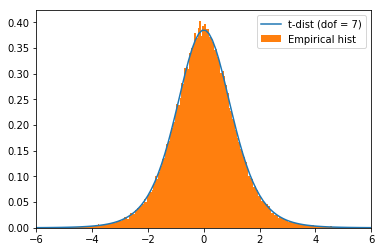

In [3]:
empirical_t(
    1.0,
    lambda size: np.random.normal(loc=1.0, scale=3.0, size=size),
    8
)

## t-distribution for large sample sizes

Below we compare the t-distribution (red) with various degrees of freedom $\nu=N-1$ with the standard normal distribution (black).

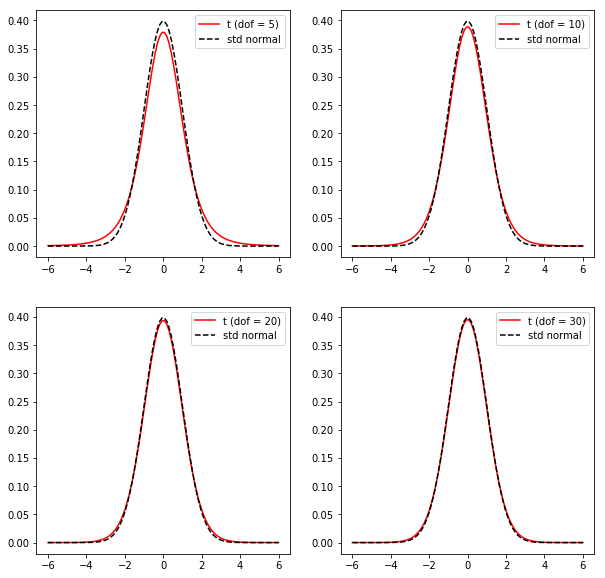

In [4]:
dofs = [5, 10, 20, 30]
xs = np.linspace(-6, 6, 100)
std_normal = stats.norm.pdf(xs)

f, axarr = plt.subplots(2, 2, figsize=(10, 10))
for dof, ax in zip(dofs, axarr.flatten()):
    ax.plot(xs, stats.t.pdf(xs, dof), 'r-', label='t (dof = {0})'.format(dof))
    ax.plot(xs, std_normal, 'k--', label='std normal')
    ax.legend()

For $\nu=5$ and $\nu=10$, it's clear that the t-distribution has fatter tails. Then, we should expect the t-distribution to be Leptokurtic. Indeed, excess kurtosis is given by $6/(\nu - 4)$ for $\nu>4$, which is always positive.

It seems like for $\nu \gtrsim 30$ the t-distribution is well-approximated by the standard normal distribution.

## Confidence interval

As we discussed above, the t-distribution is useful for estimating the mean $\mu$ of a normally-distributed population from a small sample size, when the population standard deviation $\sigma$ is unknown. Below we compute a confidence interval from scratch and compare it with the `scipy` built-in function `stats.t.interval`:

In [5]:
s = np.random.normal(loc=1.0, scale=3.0, size=8)
s_mean = np.mean(s)
sem = np.std(s, ddof=1)/np.sqrt(len(s))
confidence = 0.95

# Scipy interval
scipy_interval = stats.t.interval(confidence, df=len(s)-1, loc=s_mean, scale=sem)

# Reproduced interval
t = stats.t.ppf((1+confidence)/2.0, len(s) - 1)
rep_interval = (s_mean - t * sem, s_mean + t * sem)

print("Scipy      interval = {}".format(scipy_interval))
print("Reproduced interval = {}".format(rep_interval))

Scipy      interval = (-2.803502090877922, 3.791049937391283)
Reproduced interval = (-2.803502090877922, 3.791049937391283)


## Non-normal population

So far we've assumed that the population, whose mean we want to estimate, is normally distributed. When $N$ is sufficiently large, the central limit theorem tells us that the distribution of $\bar{x}$ is well approximated by $\mathcal{N}(\mu, \sigma^2/N)$. Also, the sample standard deviation $\hat{\sigma}$ should be sufficiently close to $\sigma$ when $N$ is large. Therefore, it's reasonable to expect that for a large enough sample size, $\sqrt{N}(\bar{x}-\mu)/\hat{\sigma}$ is approximately distributed as the standard normal distribution, even if the population distribution is non-normal.

Let's check this for two non-normal distributions: the log-normal distribution and the uniform distribution.

Below we sample the lognormal distribution $e^X$ where $X\sim \mathcal{N}(0, 1)$:

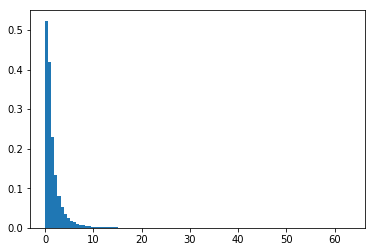

In [6]:
plt.hist(np.random.lognormal(size=100000), bins=100, normed=True);

It's pretty non-normal! Let's now experiment with the sample size needed to get a good approximation to the standard normal. Below we use $N=50$:

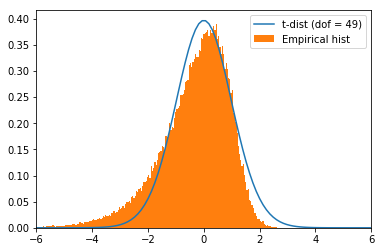

In [7]:
empirical_t(
    np.exp(0.5),
    lambda size: np.random.lognormal(size=size),
    50
)

The approximation is not very good! If we crank up $N$ to $1000$, we get a much better approximation, but the deviation from normality is still visible:

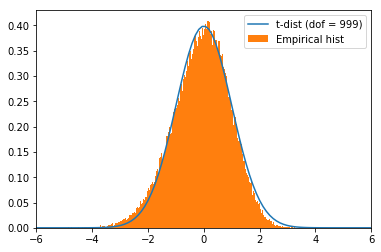

In [8]:
empirical_t(
    np.exp(0.5),
    lambda size: np.random.lognormal(size=size),
    1000
)

It seems like convergence for the log-normal distribution above is quite slow.

Let's now try the standard uniform distribution:

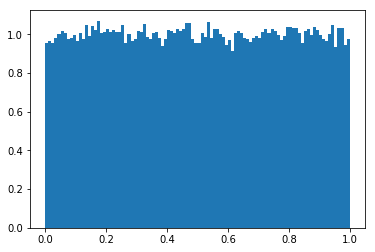

In [9]:
plt.hist(np.random.uniform(size=100000), bins=100, normed=True);

Unlike the log-normal distribution, with $50$ samples the approximation is quite good:

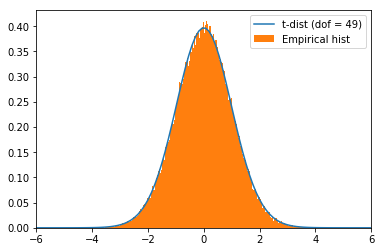

In [10]:
empirical_t(
    0.5,
    lambda size: np.random.uniform(size=size),
    50
)

## t-test

Consider the following null hypothesis: the population from which $x_1, \dots, x_N$ are independently drawn has mean $\mu_0$. With this assumption, we can calculate a concrete $t$-value: $\hat{t} = (\bar{x} - \mu_0)/(\hat{\sigma}/\sqrt{N})$. Furthermore, we can compute how likely it is to get a more extreme value than $\hat{t}$ under the null hypothesis, the so-called p-value. For a two-sided test, for instance, we can look at $\text{Pr}(t<-|\hat{t}|) + \text{Pr}(t>|\hat{t}|)$, which we can easily compute since we know $t$ has the t-distribution with $N-1$ degrees of freedom.

Let's try to compute the t-value and p-value under the assumption that $\mu=0$, for a relatively large sample that's actually drawn from a population with $\mu=1$:

In [11]:
s2 = np.random.normal(loc=1, scale=3, size=1000)
tval, pval = stats.ttest_1samp(s2, 0)

s2_sem = np.std(s2, ddof=1) / np.sqrt(len(s2))
tval_rep = s2.mean() / s2_sem
pval_rep = stats.t.cdf(-abs(tval_rep), len(s2) - 1) * 2

print("Scipy      t-value = {}".format(tval))
print("Reproduced t-value = {}".format(tval_rep))
print("")
print("Scipy      p-value = {}".format(pval))
print("Reproduced p-value = {}".format(pval_rep))

Scipy      t-value = 10.1887587591
Reproduced t-value = 10.1887587591

Scipy      p-value = 2.91611048539e-23
Reproduced p-value = 2.91611048539e-23


As expected, the p-value is very small. For a sample of this size, the $t$-distribution is very-well approximated by the standard normal distribution. So we can interpret $t=10$ as having an observation that is $10$ standard deviations away from the mean under the null hypothesis.